<h3>Task 1 OpenCode:Perform classification using KNN on the MNIST dataset</h3>
<h6>By Ayush Kumar Samal</h6>

In [39]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from tensorflow.keras.datasets import mnist



In [67]:
#importing the MNIST datset
(x_train, y_train),(x_test, y_test)=mnist.load_data()
#printing the shape of the x_train,y_train,x_test,y_test
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [57]:
#Reshaping the arrays and converting them into pandas dataframe
x_train=x_train.reshape(60000,784)
y_train=y_train.reshape(60000,1)
x_test=x_test.reshape(10000,784)
y_test=y_test.reshape(10000,1)
x_train_df=pd.DataFrame(x_train)
x_test_df=pd.DataFrame(x_test)
y_train_df=pd.DataFrame(y_train)
y_test_df=pd.DataFrame(y_test)


    
    


array([  0, 110,   1, 156,  14,  57, 254, 114,  61,  77,  80,   5,  18,
        63,  71,   3,  75, 172, 234,  60, 253, 202, 144,  38, 174,  59,
        27, 252,  40,  56,  13,   2, 103,  50,   7,  92,  54,   4,   6,
       151, 106, 243], dtype=uint8)

In [74]:
#Scaling using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train_df)
x_test=scaler.transform(x_test_df)

In [78]:
#Applying KNN model using sklearn
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
params={"n_neighbors":[2,3,4,5]}
#Using GridSearchCV for hyperparamter tuning
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(model,params,cv=5)
cv.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5]})

In [82]:
cv.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [84]:
#predicting using KNN
y_pred=cv.predict(x_test)

In [86]:
#Evaluating the model
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.95      0.99      0.97      1135
           2       0.95      0.94      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.95      0.94      0.95       982
           5       0.93      0.93      0.93       892
           6       0.97      0.97      0.97       958
           7       0.94      0.93      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000



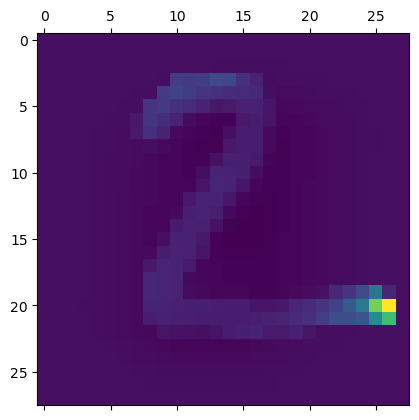

In [94]:
#Testing the model manually
plt.matshow(x_test.reshape(10000,28,28)[1])

In [96]:
print(y_pred[1])

2


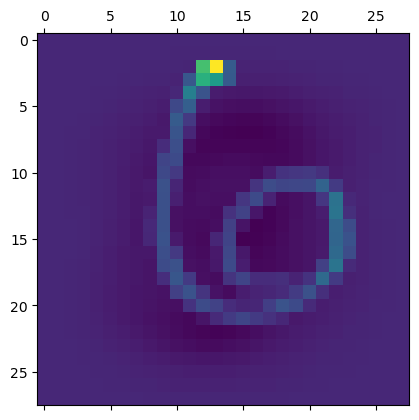

In [100]:
plt.matshow(x_test.reshape(10000,28,28)[100])

In [102]:
print(y_pred[100])

6


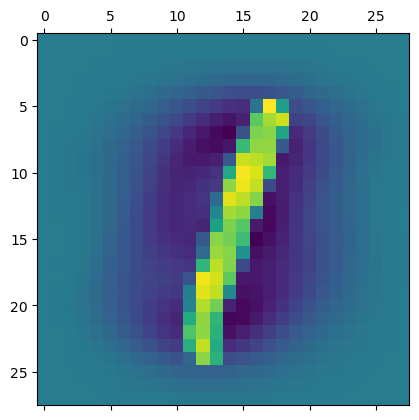

In [104]:
plt.matshow(x_test.reshape(10000,28,28)[5])

In [106]:
print(y_pred[5])

1


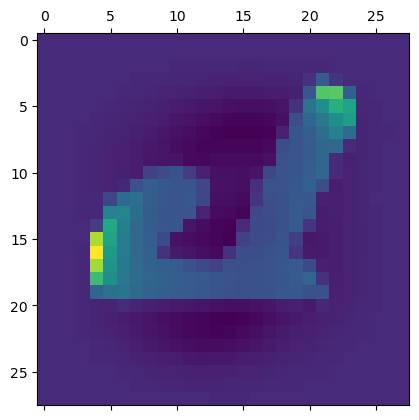

In [108]:
plt.matshow(x_test.reshape(10000,28,28)[8000])

In [110]:
print(y_pred[8000])

4


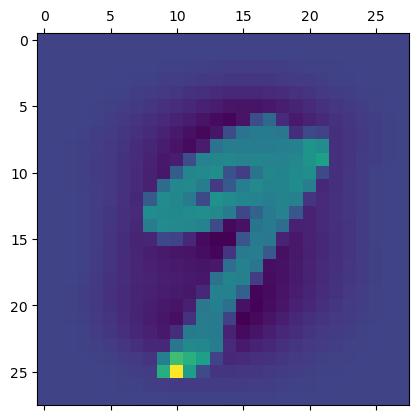

In [114]:
plt.matshow(x_test.reshape(10000,28,28)[20])

In [116]:
print(y_pred[20])

9
